In [77]:
######## Test!!!!

In [126]:
import numpy as np,\
pandas as pd,\
seaborn as sns,\
matplotlib.pyplot as plt,\
sklearn.preprocessing as Scaler

import sklearn

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [127]:
train_data = pd.read_csv('../input/train.csv')
test_data = pd.read_csv('../input/test.csv')

In [128]:
features_to_drop = ['GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF']
features_to_trans = ['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
                     'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
                     'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'LotFrontage',
                     'BsmtFinSF1', 'WoodDeckSF', '1stFlrSF',
                     'GrLivArea', 'BsmtUnfSF', '2ndFlrSF', 'HalfBath']
features_categorical = ['LotShape', 'OverallQual', 'OverallCond', 'LandContour', 'YearBuilt', 'Utilities', 'LotConfig',
                        'YearRemodAdd', 'GarageFinish', 'MoSold', 'GarageQual', 'YrSold', 'GarageCond', 'PavedDrive',
                        'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSZoning', 'MSSubClass',
                        'Street', 'Alley', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
                        'GarageType', 'GarageYrBlt']
features_numerical = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
                      '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                      'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
                      'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
features_not_label_encode = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'GarageYrBlt','GarageYrBlt']

In [129]:
features_to_drop = ['GarageArea', 'TotRmsAbvGrd', 'TotalBsmtSF']
features_to_trans = ['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
                     'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
                     'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'LotFrontage',
                     'BsmtFinSF1', 'WoodDeckSF', '1stFlrSF',
                     'GrLivArea', 'BsmtUnfSF', '2ndFlrSF', 'HalfBath']
features_categorical = ['LotShape', 'OverallQual', 'OverallCond', 'LandContour', 'YearBuilt', 'Utilities', 'LotConfig',
                        'YearRemodAdd', 'GarageFinish', 'MoSold', 'GarageQual', 'YrSold', 'GarageCond', 'PavedDrive',
                        'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSZoning', 'MSSubClass',
                        'Street', 'Alley', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
                        'GarageType', 'GarageYrBlt']
features_numerical = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
                      '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                      'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
                      'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
features_not_label_encode = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'GarageYrBlt','GarageYrBlt']
features_na_cat = ['LotShape', 'OverallQual', 'OverallCond', 'LandContour', 'YearBuilt', 'Utilities', 'LotConfig',
                        'YearRemodAdd', 'GarageFinish', 'MoSold', 'GarageQual', 'YrSold', 'GarageCond', 'PavedDrive',
                        'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSZoning', 'MSSubClass',
                        'Street', 'Alley', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
                        'GarageType', 'GarageYrBlt']

In [130]:
train_data = train_data.sample(frac = 1).reset_index(drop = True)

In [131]:
# # Join training and test dataframes for easy preprocessing
# #
# ######################################
Y = train_data[['Id', 'SalePrice']]
all_data = pd.concat((train_data.drop(columns = ['SalePrice']), test_data))

In [132]:
# Join training and test dataframes for easy preprocessing
#
######################################
# Y = train_data[['Id', 'SalePrice']]
# all_data = pd.concat((train_data, test_data))

In [133]:
# Get and Split N/A faetures
#
######################################
features_na = (all_data.isnull() == True).sum().sort_values(ascending = False)
features_na = features_na[features_na > 0].index
# features_na_num = [x for x in features_na if x in features_numerical]
# features_na_cat = [x for x in features_na if x in features_categorical]

In [134]:
# Fill NA
#
######################################
all_data = all_data.drop(columns = features_to_drop)

all_data['MSZoning'].fillna('RL')
all_data['Functional'].fillna('Typ')
all_data['Utilities'].fillna('AllPub')
all_data['Electrical'].fillna('SBrkr')
all_data['SaleType'].fillna('WD')
all_data['KitchenQual'].fillna('TA')
all_data['Exterior1st'].fillna('VinylSd')
all_data['Exterior2nd'].fillna('VinylSd')

all_data[features_not_label_encode] = all_data[features_not_label_encode].fillna(0)

all_data[features_na_cat] = all_data[features_na_cat].fillna("None")

all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda col: 
                                                                                    col.fillna(col.dropna().median()))

all_data[features_na_num] = all_data[features_na_num].fillna(0)


In [135]:
# Log Transformation
#
#######################################
Y['SalePrice'] = np.log1p(Y['SalePrice'])

all_data[features_to_trans] = np.log1p(all_data[features_to_trans])
# all_data['SalePrice'] = np.log1p(all_data['SalePrice'])

In [136]:
# label encode features
#
##################################
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in features_categorical:
# for col in cols:
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(list(all_data[col].values))
    all_data[col] = le.transform(list(all_data[col].values))

In [137]:
###### assign dummy variable
#
#######################################

all_data_dum = pd.get_dummies(all_data.drop('Id', axis = 1))

In [138]:
all_data_dum.shape

(2919, 76)

In [139]:
# Y = all_data_dum['SalePrice'][:len(train_data)]
# all_data_dum = all_data_dum.drop(columns = ['SalePrice'])

In [140]:
Y

,Id,SalePrice
0,906,11.759793
1,322,12.777055
2,191,12.660331
3,239,12.669810
4,905,11.740069
5,423,11.635152
6,1280,11.133143
7,401,12.411056
8,883,12.089544
9,1329,12.452937


In [141]:
from sklearn import preprocessing

In [142]:
# poly2 = sklearn.preprocessing.PolynomialFeatures(degree = 2)
# poly2.fit(all_data_dum)
# all_data_dum = poly2.fit_transform(all_data_dum)

In [143]:
# Convert Fake numerical Features to strings
# 
#######################################
all_data_dum[['OverallQual', 'OverallCond', 'YearBuilt', 'MSSubClass']] = all_data_dum[
    ['OverallQual', 'OverallCond', 'YearBuilt', 'MSSubClass']].astype(str)

In [144]:
# Randomise data
# 
# all_data_dum = pd.DataFrame(all_data_dum).sample(frac = 1).reset_index(drop = True)

In [145]:
# get training_data
#
###################
training_data = all_data_dum[:len(train_data)]

In [146]:
def rmsError(x, y):
    return np.sqrt(np.sum(np.power(x - y, 2)) / len(x))

In [147]:
from sklearn import linear_model

In [148]:
training_set = training_data[ : -400]
Y_training_set = Y['SalePrice'][ : -400]
# Y_training_set = Y[ : -400]

cv_set = training_data[-400 : ]
Y_cv_set = Y['SalePrice'][-400 : ]
# Y_cv_set = Y[-400 : ]

Linear regression

In [150]:
# test 1 : no regression, intercept calculation, no normalization
#
######################
test_model_1 = sklearn.linear_model.LinearRegression(copy_X = True, normalize = False)
test_model_1.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_1.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_1.predict(cv_set)))

training error =	 0.1079749114512272
cv error =		 0.1749832135312623


In [151]:
# test 3 : no regression, intercept calculation, normalization
#
######################
test_model_3 = sklearn.linear_model.LinearRegression(copy_X = True, normalize = True)
test_model_3.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_3.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_3.predict(cv_set)))

training error =	 0.10797491145122715
cv error =		 0.17498321353126262


In [152]:
# test 2 : no regression, no intercept calculation, no normalization
#
######################
test_model_2 = sklearn.linear_model.LinearRegression(copy_X = True, fit_intercept=False)
test_model_2.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_2.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_2.predict(cv_set)))

training error =	 0.12884493960819807
cv error =		 0.2328458350713903


Ridge regression

In [153]:
# Test 4 : 
#
############################
test_model_4 = sklearn.linear_model.Ridge(copy_X = True, fit_intercept = False, alpha = .1, tol = 0.000000001)
test_model_4.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_4.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_4.predict(cv_set)))

training error =	 0.12885789006804388
cv error =		 0.23255010177146443


In [154]:
# Test 4 : 
#
############################
test_model_4 = sklearn.linear_model.Ridge(copy_X = True, fit_intercept = False, alpha = 10, tol = 0.000000001)
test_model_4.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_4.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_4.predict(cv_set)))

training error =	 0.14119936806630137
cv error =		 0.2274938041868807


In [175]:
ar = []
ar2 = []
indices = []
for i in range(1, 150):
    alpha = i
#     alpha = (alpha * 1000) / 1000
    test_model_41 = sklearn.linear_model.Ridge(copy_X = True, fit_intercept = True, alpha = alpha, max_iter = 1000)
    test_model_41.fit(training_set, Y_training_set)
    ar.append(rmsError(test_model_41.predict(training_set), Y_training_set))
    ar2.append(rmsError(Y_cv_set, test_model_41.predict(cv_set)))
    indices.append(str(alpha)[:5])

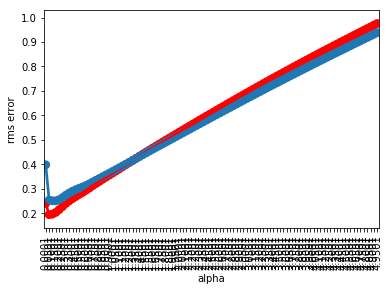

In [201]:
fig = sns.pointplot(indices, ar, color = 'red', legend = True)
fig = sns.pointplot(indices, ar2)
fig.set(xlabel = 'alpha', ylabel = 'rms error')
fig = plt.xticks(rotation = 90)
#fig.get_figure().savefig('../images/ridge_alpha.png')

In [180]:
test_model_42 = sklearn.linear_model.RidgeCV(fit_intercept = True, cv = 6, alphas = [1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 4, 10])
test_model_42.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_42.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_42.predict(cv_set)))

training error =	 0.1085306386475268
cv error =		 0.17553911365625036


In [182]:
test_model_42.alpha_

2.4

In [183]:
ar = []
ar2 = []
indices = []
for i in range(100, len(training_set), 50):
#     alpha = i*.1
    test_model_43= sklearn.linear_model.Ridge(copy_X = True, fit_intercept = False, alpha = 2.4, max_iter = 10000000)
    test_model_43.fit(training_set[ : i], Y_training_set[ : i])
    ar.append(rmsError(test_model_43.predict(training_set), Y_training_set))
    ar2.append(rmsError(Y_cv_set, test_model_43.predict(cv_set)))
    indices.append(i)

[Text(0,0.5,'rms error'), Text(0.5,0,'samples')]

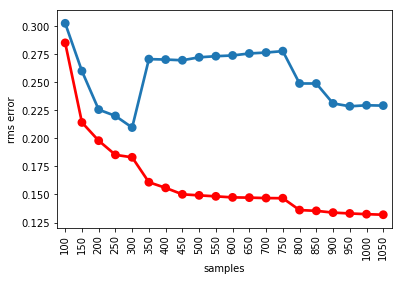

In [185]:
fig = sns.pointplot(indices, ar, color = 'red')
fig = sns.pointplot(indices, ar2)
plt.xticks(rotation = 90)
fig.set(xlabel = 'samples', ylabel = 'rms error')
# fig.get_figure().savefig( '../images/ridge_m.png', dpi = 1000)

In [186]:
# Lasso test
#
############################
test_model_5 = sklearn.linear_model.LassoCV(copy_X = True, max_iter = 1000, fit_intercept = True, alphas = [1])
test_model_5.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_5.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_5.predict(cv_set)))
print("alpha = ", test_model_5.alpha_)

training error =	 0.2949189810422313
cv error =		 0.3170486824738727
alpha =  1


In [197]:
# Lasso test
#
############################
test_model_5 = sklearn.linear_model.Lasso(copy_X = True, max_iter = 1000, fit_intercept = True, alpha = 0.02)
test_model_5.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_5.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_5.predict(cv_set)))
# print("alpha = ", test_model_5.alpha_)

training error =	 0.15088928799969398
cv error =		 0.18802083818307322


In [191]:
ar = []
ar2 = []
indices = []
for i in range(1, 40000, 1000):
    alpha = i * .00001
#     alpha = (alpha * 1000) / 1000
    test_model_51 = sklearn.linear_model.Lasso(copy_X = True, fit_intercept = True, alpha = alpha, max_iter = 1000)
    test_model_51.fit(training_set, Y_training_set)
    ar.append(rmsError(test_model_51.predict(training_set), Y_training_set))
    ar2.append(rmsError(Y_cv_set, test_model_51.predict(cv_set)))
    indices.append(str(alpha)[:6])

[Text(0,0.5,'rms error'), Text(0.5,0,'alpha')]

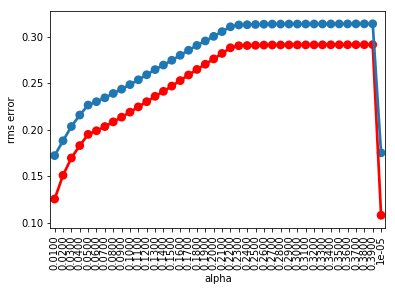

In [192]:
fig = sns.pointplot(indices, ar, color = 'red')
fig = sns.pointplot(indices, ar2)
plt.xticks(rotation = 90)
fig.set(xlabel = 'alpha', ylabel = 'rms error')
# fig.get_figure().savefig('../images/lasso_alpha.png', dpi = 1000)

In [134]:
ar = []
ar2 = []
indices = []
for i in range(100, len(training_set), 50):
#     alpha = i*.1
    test_model_53= sklearn.linear_model.Lasso(copy_X = True, fit_intercept = False, alpha = 0.0029, max_iter = 10000000)
    test_model_53.fit(training_set[ : i], Y_training_set[ : i])
    ar.append(rmsError(test_model_53.predict(training_set), Y_training_set))
    ar2.append(rmsError(Y_cv_set, test_model_53.predict(cv_set)))
    indices.append(i)

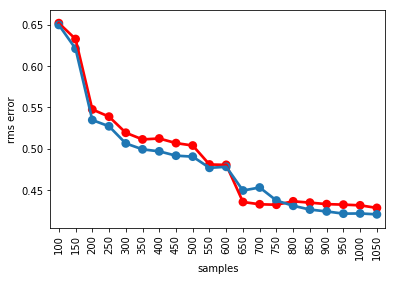

In [135]:
fig = sns.pointplot(indices, ar, color = 'red')
fig = sns.pointplot(indices, ar2)
plt.xticks(rotation = 90)
fig.set(xlabel = 'samples', ylabel = 'rms error')
fig.get_figure().savefig('../images/lasso_m.png', dpi = 500)

In [210]:
# Elastic Net
#
########################################
test_model_6 = sklearn.linear_model.ElasticNet(copy_X = True, fit_intercept = False, max_iter = 1000000, alpha = 0.1, l1_ratio = 0.12)
test_model_6.fit(training_set, Y_training_set)
print("training error =\t", rmsError(test_model_6.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_6.predict(cv_set))) 

training error =	 0.4671477246410791
cv error =		 0.4581912442461517


In [198]:
minar = []
ratios = []
for r in range(1, 200, 5):
#     print(r)
#     ratio = r * .01
    ratio = 0.10 + r * 0.001
    ar = []
    ar2 = []
    indices = []
    for i in range(1, 50000, 500):
        alpha = i * .0001
        test_model_61 = sklearn.linear_model.ElasticNet(copy_X = True, fit_intercept = False, alpha = alpha, l1_ratio = ratio)    
        test_model_61.fit(training_set, Y_training_set)
        ar.append(rmsError(test_model_61.predict(training_set), Y_training_set))
        ar2.append(rmsError(Y_cv_set, test_model_61.predict(cv_set)))
        indices.append(str(alpha)[:6])
    minar.append(np.min(ar2))
    ratios.append(str(ratio)[:4])

[Text(0,0.5,'min(error)'), Text(0.5,0,'ratio')]

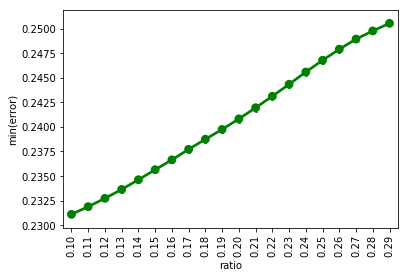

In [199]:
figg = sns.pointplot(x = ratios, y = minar, color = 'green')
plt.xticks(rotation = 90)
figg.set(xlabel = 'ratio', ylabel = 'min(error)')
# figg.get_figure().savefig('../images/elastic_ratio2.png', dpi = 500)

In [36]:
ar = []
ar2 = []
indices = []
for i in range(1, 2500, 250):
    alpha = i * .0001
    test_model_61 = sklearn.linear_model.ElasticNet(copy_X = True, fit_intercept = False, alpha = alpha, l1_ratio = 0.12)    
    test_model_61.fit(training_set, Y_training_set)
    ar.append(rmsError(test_model_61.predict(training_set), Y_training_set))
    ar2.append(rmsError(Y_cv_set, test_model_61.predict(cv_set)))
    indices.append(str(alpha)[:6])

[Text(0,0.5,'rms error'), Text(0.5,0,'alpha')]

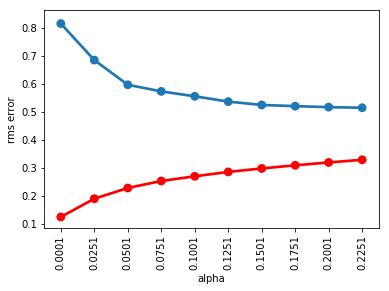

In [37]:
fig = sns.pointplot(indices, ar, color = 'red')
fig = sns.pointplot(indices, ar2)
plt.xticks(rotation = 90)
fig.set(xlabel = 'alpha', ylabel = 'rms error')
# fig.get_figure().savefig('../images/elastic_alpha.png', dpi = 500)
# print("min = ", np.min(ar2))

min =  0.5143329657781792


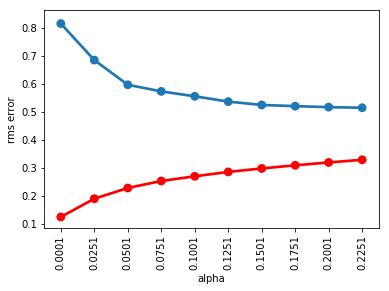

In [38]:
fig = sns.pointplot(indices, ar, color = 'red')
fig = sns.pointplot(indices, ar2)
plt.xticks(rotation = 90)
fig.set(xlabel = 'alpha', ylabel = 'rms error')
# fig.get_figure().savefig('../images/elastic_alpha.png', dpi = 500)
print("min = ", np.min(ar2))

In [202]:
test_model_8 = sklearn.linear_model.Lasso(copy_X = True, max_iter = 100000, fit_intercept = False, alpha = 0.0029)
test_model_8.fit(training_data, Y['SalePrice'])
print("training error =\t", rmsError(test_model_8.predict(training_data), Y['SalePrice']))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_8.predict(cv_set)))
# print("alpha = ", test_model_8.alpha_)

training error =	 0.16779065774269597
cv error =		 0.20058204501997923


In [96]:
# Test 4 : 
#
############################
test_model_4 = sklearn.linear_model.Ridge(copy_X = True, normalize = True, alpha = 0.1, tol = 0.000000001)
test_model_4.fit(all_data_dum[ : len(train_data)], Y['SalePrice'])
print("training error =\t", rmsError(test_model_4.predict(training_set), Y_training_set))
print("cv error =\t\t", rmsError(Y_cv_set, test_model_4.predict(cv_set)))

training error =	 0.38005301908107564
cv error =		 0.3449200129334893


In [97]:
temp = pd.DataFrame()
temp['Id'] = test_data['Id']

In [98]:
temp['SalePrice'] = pd.DataFrame(np.expm1(test_model_4.predict(all_data_dum[len(train_data) : ])))

In [100]:
temp

,Id,SalePrice
0,1461,170344.965210
1,1462,150003.087012
2,1463,206102.542508
3,1464,129793.995445
4,1465,184538.237079
5,1466,165424.003167
6,1467,152255.291843
7,1468,187490.514148
8,1469,177318.449122
9,1470,161455.038657


In [102]:
temp.to_csv('../Output/out.csv', index = False)